In [ ]:
#https://drive.google.com/file/d/19lCs0VBMr1f1vlR7OwPPVz0LXzAn68kB/view?usp=drive_link
import os
import gdown

# Reemplazamos con el ID del archivo compartido en Google Drive
file_id = "19lCs0VBMr1f1vlR7OwPPVz0LXzAn68kB"
output_file = "dataset.zip"

# Construimos el enlace de descarga y descargamos el archivo
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

# Descomprimimos el archivo en la carpeta 'dataset'
!unzip -o dataset.zip -d dataset

Downloading...
From (original): https://drive.google.com/uc?id=19lCs0VBMr1f1vlR7OwPPVz0LXzAn68kB
From (redirected): https://drive.google.com/uc?id=19lCs0VBMr1f1vlR7OwPPVz0LXzAn68kB&confirm=t&uuid=4f0cbfdf-8fb8-44d6-976e-220e26d0a1ef
To: /content/dataset.zip
100%|██████████| 369M/369M [00:02<00:00, 149MB/s]


Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_9.tif  
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_9_mask.tif  
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif  
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10.tif  
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10_mask.tif  
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11.tif  
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11_mask.tif  
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12.tif  
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_

En la siguiente parte del código se hace lo siguiente:

1. Se importan las librerías necesarias:
- os: se utiliza para manejar rutas y archivos.
- cv2 (de OpenCV): se utiliza para cargar imágenes
- numpy : se utiliza para operaciones numéricas, si fuese necesario
- matplotlib.pyplot : visualización de imágenes

2. Se define la ruta donde se van a encontrar y almacenar las imágenes y las máscaras. Estas rutas se guardarán en las variables dataset_path (ruta para descargar las imágenes), image_paths y mask_paths (ruta para almacenar imágenes y máscaras)

3. Iteramos sobre todas las carpetas del dataset_path. Durante esta iteración se realizarán distintos pasos:
- Se unirá la ruta de la carpeta con el nombre de cada carpeta para obtener la ruta completa.
- Se realiza una comprobación para ver si realmente es una carpeta, ya que puede haber archivos sueltos.
- Ordenamos los archivos de la carpeta, esto se hace para que estén bien relacionadas las imágenes con sus máscaras.
- El siguiente paso, es algo complejo, se crea un diccionario images. En este diccionario se guardará como claves, el nombre de los archivos sin la extensión .tif, como valores las rutas completas a las imágenes. Importante notar que solo se guardan las imágenes en este diccionario y se obvian las máscaras.
- Al igual que el anterior paso, se crea un diccionario masks. En este diccionario se guardará como claves, el nombre de los archivos referentes a las máscaras sin la la extensión .tif y sin la parte del nombre "_mask", y como valores las rutas correspondientes a las máscaras. Notar que solo se guardarán las máscaras en este diccionario.
- Por cada imagen, verifica si hay una máscara relacionada con la dicha imagen. Si la hay, añadimos la imagen a la ruta de imágenes y la máscara correspondiente a la ruta de máscaras. De esta manera evitamos trabajar con imágenes que no tienen máscara y viceversa.

4. Como última parte de este paso, se realiza una pequeña prueba para visualizar que las imágenes están guardadas correctamente y se muestran junto con su máscara

Pares de imagen/máscara encontrados: 3929
Ejemplo de rutas de imágenes: ['dataset/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif', 'dataset/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10.tif', 'dataset/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11.tif']
Ejemplo de rutas de máscaras: ['dataset/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_mask.tif', 'dataset/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10_mask.tif', 'dataset/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11_mask.tif']
Dimensión de la imagen: (256, 256)
Dimensión de la máscara: (256, 256)


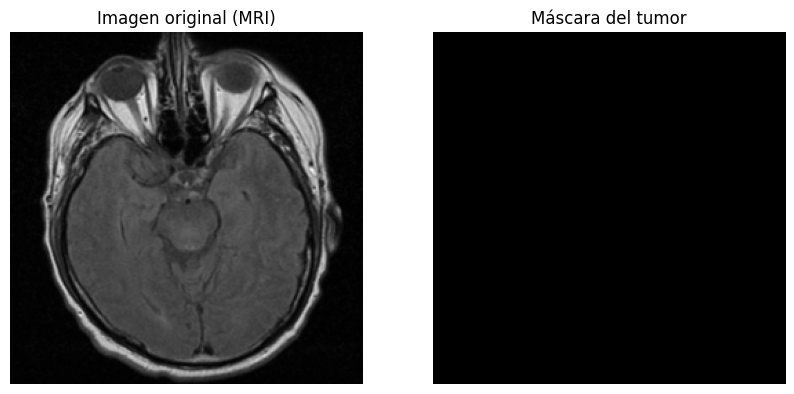

In [ ]:
#Primer paso, importar las librerías que vamos a utilizar
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

#os la utilizaremos para manejar las rutas de los archivos
#cv2 la usaremos para cargar las imágenes
#numpy será de utilidad para las operaciones numéricas
#haremos uso de matplotlib para visualizar las imágenes


# Ruta del dataset
dataset_path = "dataset/lgg-mri-segmentation/kaggle_3m"

# Listas para almacenar rutas de imágenes y máscaras
image_paths = []
mask_paths = []

for folder in sorted(os.listdir(dataset_path)):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        files = sorted(os.listdir(folder_path))
        # Crear un diccionario con claves base (sin _mask) para emparejar
        images = {f.replace('.tif', ''): os.path.join(folder_path, f)
                  for f in files if f.endswith('.tif') and '_mask' not in f}
        masks = {f.replace('_mask.tif', ''): os.path.join(folder_path, f)
                 for f in files if '_mask' in f}
        for key in images:
            if key in masks:
                image_paths.append(images[key])
                mask_paths.append(masks[key])

print(f"Pares de imagen/máscara encontrados: {len(image_paths)}")


# Verificar las primeras imágenes y máscaras encontradas
print("Ejemplo de rutas de imágenes:", image_paths[:3])
print("Ejemplo de rutas de máscaras:", mask_paths[:3])

#Una vez hemos encontrado las imágenes y las máscaras vamos a cargar una imagen y vamos a visualizarla
#Es muy importante antes de entrenar un modelo, entender el conjunto de datos
#Y la mejor manera de entenderlo es visualizarlo
#Como hemos explicado antes, usaremos cv2 para cargar imágeness y matplotlib para visualizarlas


# Seleccionamos una imagen y su máscara correspondiente
sample_idx = 1  # Se puede cambiar el índice para probarlo con distintas imágenes
image_path = image_paths[sample_idx]
mask_path = mask_paths[sample_idx]

# Cargamos la imagen y la máscara en escala de grises
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Verificamos las dimensiones tanto de la imagen como de la máscara
print("Dimensión de la imagen:", image.shape)
print("Dimensión de la máscara:", mask.shape)

# Mostramos la imagen y la máscara
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap="gray") #Imagen original en escala de grises
ax[0].set_title("Imagen original (MRI)") #Esto es simplemente para ponerle un título a la imagen

#Como no queremos que se muestren los ejes, los desactivamos con la función axis("off")
ax[0].axis("off")

#Y repetimos lo mismo con la máscara
ax[1].imshow(mask, cmap="gray")
ax[1].set_title("Máscara del tumor")
ax[1].axis("off")

plt.show()

El próximo paso juega un papel fundamental en el entrenamiento del modelo, el preprocesamiento de los datos. Se van a preparar las imágenes para que todas tengan el mismo tamaño.

1. Importar las librerías: cv2, numpy, torch y transforms de torchvisions. Estas dos últimas sirven para:
- Trabajar con tensores.
- Aplicar transformaciones a las imágenes.

Un tensor es simplemente una estructura de datos que generaliza los conceptos escalares (tensor de 0 dimensiones), vectores (tensor de 1 dimensión) y matrices (tensor de 2 dimensiones) a dimensiones superiores.

En Deep Learning, los datos y los parámetros neuronales se expresan mediante tensores.

2. Se define el tamaño deseado para las imágenes (256x256).

3. Se realizan una serie de transformaciones a las imágenes (transforms.Compose)
- ToTensor(): se convierte la imagen de un array (numpy) a tensor (PyTorch), y reescala los valores de [0,255] a [0,1].
- Normalize(mean[0.5],std[0.5]): normaliza los valores para que estén en el rango [-1,1].

¿Por qué se normaliza a valores [-1,1]?
- Mejora el entrenamiento de la red neuronal: cuando los valores están cercanos a 0, las redes neuronales profundas aprenden más rápido y de manera más estable.
- Evita saturación en funciones de activación: existen funciones de activación comunes como RelU (se utilizará más adelante), que funcionan mejor con datos pequeños y poco desbalanceados, por ello es mejor trabajar con números pequeños.
- En visión por computador, cuando se utilizan técnicas comunes, se trabaja con este rango, es por así decirlo, un estándar.

4. Definición de la función preprocess_image. Recibe parámetros como la ruta de una imagen y su máscara. En dicha función se realizan los siguientes pasos:
- Se carga la imagen y su máscara en escala de grises (imread).
- Se redimensiona tanto la imagen como la máscara al tamaño de 256x256 píxeles (resize).
- Como se necesita que la máscara esté en blanco (área tumoral) y negro (área no tumoral), vamos a convertir la máscara en un vector binario. Los píxeles donde la máscara sea mayor que 0, se pintarán en blanco, y los píxeles con valores igual a 0, se pintarán en negro ((mask > 0).astype(np.float32)).
- Se aplican las transformaciones definidas en el paso 3.
- Se añade un canal de profundidad, las imágenes pasarán de ser tensor(256,256) a tensor(1,256,256) (unsqueeze(0)).
- Se retorna la imagen y la máscara preprocesada.

5. Se realiza una pequeña prueba para mostrar los tamaños de los tensores.

In [ ]:
#Preprocesamiento de datos
!pip install torch torchvision
#Primer paso, redimensionar las imágenes y normalizarlas

#Importamos las librerías, entre ellas PyTorch que va a ser la base de nuestro
#modelo de redes neuronales
import cv2
import torch
import numpy as np
from torchvision import transforms

# Definimos el tamaño deseado, en este caso vamos a utilizar imágenes de 256x256
IMG_SIZE = (256, 256)

# Transformaciones para normalizar las imágenes
transform = transforms.Compose([
    transforms.ToTensor(),  # Convertimos a tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalizamos a rango [-1, 1]
])

#Vamos a definir una función que dada una ruta de una imagen y una máscara, las preprocese
def preprocess_image(image_path, mask_path):
    # Cargamos la imagen y la máscara
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Redimensionamos ambas al tamaño deseado (256x256)
    image = cv2.resize(image, IMG_SIZE)
    mask = cv2.resize(mask, IMG_SIZE)

    # Convertimos la máscara a valores binarios (0 y 1)
    mask = (mask > 0).astype(np.float32)

    # Aplicamos transformaciones
    image = transform(image)
    mask = torch.tensor(mask).unsqueeze(0)  # Añadimos canal de profundidad

    return image, mask

# Probamos con una imagen
sample_idx = 0
image_tensor, mask_tensor = preprocess_image(image_paths[sample_idx], mask_paths[sample_idx])

# Verificamos tamaños
print("Tamaño del tensor de imagen:", image_tensor.shape)
print("Tamaño del tensor de máscara:", mask_tensor.shape)



Tamaño del tensor de imagen: torch.Size([1, 256, 256])
Tamaño del tensor de máscara: torch.Size([1, 256, 256])


EL siguiente paso, es construir un Dataset personalizado con PyTorch (DataSet y DataLoader).

Pasos:
1. Importar las estructuras necesarias:
- Dataset de torch.utils.data
- DataLoader de torch.utils.data

2. Definir una clase BrainTumorDataset que herede de Dataset. Esta clase manejará cómo cargar las imágenes y las máscaras preprocesadas.
- En el constructor, se guardará las rutas de las imágenes y máscaras como atributos del objeto.
- __len__ : define cuántos elementos tiene el conjunto de datos. El número de imágenes y de máscaras debe ser igual.
- __getitem__ : devuelve un elemento de ejemplo en un índice concreto. Carga y preprocesa la imagen y su máscara. Devuelve el par (imagen,máscara).

3. Pequeña prueba para conocer cuántas imágenes con sus respectivas máscaras hay en el dataset.

In [ ]:
#Queremos definir un Dataset personalizado con PyTorch.
#Esta librería nos ofrece dos herramientas para ello, DataSet y DataLoader

#Los importamos
from torch.utils.data import Dataset, DataLoader

#Creamos una clase BrainTumorDataset
#que carga las imágenes y máscaras usando el método preprocess_image().
class BrainTumorDataset(Dataset):
  #Constructor de la clase
  def __init__(self, image_paths, mask_paths):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
  #Función len que devuelve la longitud del dataset
  def __len__(self):
    return len(self.image_paths)
  #Función getitem que nmos devuelve el item del dataset en el índice pasado por parámetro
  def __getitem__(self, index):
      image, mask = preprocess_image(self.image_paths[index], self.mask_paths[index])
      return image, mask

#Creamos el dataset pasandole por parámetro las rutas de las imágenes y las rutas de las máscaras
dataset = BrainTumorDataset(image_paths, mask_paths)
#Verificamos el tamaño del dataset
print("Total de imágenes del dataset: ", len(dataset))


Total de imágenes del dataset:  3929


El siguiente paso, consiste en dividir el conjunto de datos en 2 subconjuntos:
- Entrenamiento: será utilizado para el entrenamiento del modelo y será del 80% del conjunto de datos.
- Validación: será utilizado para la validación del modelo, y será del 20% del conjunto de datos.

1. Importación de train_test_split que servirá para dividir el conjunto de datos.

- image_paths y mask_paths se dividen simultáneamente en un 80% para entrenamiento y 20% para validación.

- test_size=0.2 significa que el 20% de los datos se reservará para validación.

- random_state=42 asegura que siempre se obtenga la misma partición si se vuelve a ejecutar el script (esto garantiza reproducibilidad).

¿Por qué 42? El 42 se popularizó en la comunidad científica por la novela "Guía del autoestopista galáctico" donde 42 es "la respuesta a la vida, el universo y todo". Es utilizado de forma estándar.

2. Se crean dos instancias de BrainTumorDataset, una para entrenamiento y otra para validación.

In [ ]:
from sklearn.model_selection import train_test_split

#Dividimos en entrenamiento (80%) y validación (20%), tanto para las imágenes como para las máscaras
train_images, val_images, train_masks, val_masks = train_test_split(
    image_paths, mask_paths, test_size=0.2, random_state=42
)
#El parámetro ramdom_state es muy interesante para nosotros, porque queremos que el conjunto de datos sea reproducible,
#Y justamente este parámetro nos lo garantiza. Es importante mencionar que se puede asignar cualquier número,
#pero por alguna razón, la comunidad científica utiliza el 42.

# Creamos datasets
train_dataset = BrainTumorDataset(train_images, train_masks)
val_dataset = BrainTumorDataset(val_images, val_masks)

#Por último comprobamos que el tamaño de ambos datasets cuadran con lo que buscamos
print("Tamaño del dataset de entrenamiento:", len(train_dataset))
print("Tamaño del dataset de validación:", len(val_dataset))

Tamaño del dataset de entrenamiento: 3143
Tamaño del dataset de validación: 786


Se crean dos DataLoaders:
- train_loader: cargará los datos en lotes de 8 ejemplos, los cuáles se barajan de forma aleatoria. Esto es importante y muy bueno para el modelo ya que aprenderá a generalizar mejor y no aprender un orden fijo de datos.
- val_loader: cargará los datos en lotes de 8 ejemplos, pero estos no se barajan porque para la validación se requiere tener un orden para lograr consistencia.

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# Verificamos un batch de datos
for images, masks in train_loader:
    print("Dimensiones del batch de imágenes:", images.shape)
    print("Dimensiones del batch de máscaras:", masks.shape)
    break

Dimensiones del batch de imágenes: torch.Size([8, 1, 256, 256])
Dimensiones del batch de máscaras: torch.Size([8, 1, 256, 256])


Tanto el IoU como el Dice Loss son claves para trabajar con la segmentación de imágenes, especialmente para trabajar con cuestiones críticas, como puede ser los tumores cerebrales.

Estas métricas intentan comparar dos áreas:
- La predicción del modelo (la máscara que predice dónde está el tumor).
- La realidad (la máscara del tumor en la imagen real).

Intersection over Union (IoU):
IoU = Área de intersección / Área de Unión;

Intersección: píxeles que están marcados como tumor en ambas máscaras (predicha y real).

Unión: píxeles marcados como tumor en al menos una de las dos máscaras.

Dice Coefficient o F1 Score:
Es muy parecido al IoU pero dándole más peso a la intersección. Esto quiere decir que puede ser útil cuando hay pocos positivos como pueden ser las imágenes médicas.

Ambas métricas son sensibles al solapamiento, el IoU penaliza los falsos positivos pero el Dice Coefficient algo menos y, ambos pueden ser muy útiles en la segmentación de imágenes cerebrales.

En este caso, utilizaremos ambas métricas pero el Dice Loss lo utilizaremos para guiar el modelo. Minimizaremos la pérdida, por ello calcularemos esta pérdida como 1 - Dice. Además de esto, calcularemos el IoU.

También es importante saber qué valores son buenos de recibir de estos modelos para entender si nuestro modelo es un buen modelo y segmenta bien dónde están los cánceres.

En cuánto al Dice Loss:
- Dice Loss = 0 --> Predicción perfecta.
- Dice Loss = 1 --> Predicción completamente incorrecta.
Por tanto, buscaremos valores cercanos a 0 en dicha métrica.

En cuanto al IoU:
- Si el IoU está cercano a 0 no es un buen modelo.
- Buscamos que el modelo se acerque a 1, aunque con un IoU mayor a 0,80 sería un modelo excelente para la segmentación. Debido a la dificultad del problema, hay estudios que indican que para el contexto de las imágenes médicas un IoU de 0,7 ya sería un modelo excelente.

El siguiente paso es muy largo así que lo dividiremos en bloques.
1. Importaciones:

- os, cv2, numpy, pyplot, Dataset, DataLoader, torch, train_test_split.
- torch.nn para redes neuronales de PyTorch.
- torch.optim para optimización de redes neuronales.
- albumentations para aumentos de imagen y normalización.
- TensorV2 para convertir imágenes aumentadas a tensores

2. Configuración

- Selección de GPU si está disponible.
- Tamaño de lotes de imágenes (8).
- Dimensiones de las imágenes.
- Número de épocas de entrenamiento.

3. Definición de dataset personalizado, similar al anterior pero con algunas variaciones. Carga de la imagen en RGB. Cambio de BGR (OpenCV) a RGB (formato correcto para visualización). Máscara en escala de grises. Por lo demás es igual al anterior Dataset personalizado que definimos anteriormente.

¿Por qué se crea otro Dataset? El primero se utiliza para explorar datos, ver cómo eran las imágenes y las máscaras, pruebas para cargar datos.

Este dataset personalizado es mucho más completo para un modelo serio (U-Net), ya que se necesita:
- Imágenes en formato RGB.
- Aumentos de datos reales para la mejora del entrenamiento.
- Más control sobre la normalización.
- Preparación de máscaras.

4. Transformaciones

Se aplican transformaciones al conjunto de imágenes y máscaras para mejorar el entrenamiento.
- Para el entrenamiento se aplica resize, flip horizontal, cambios de brillo/contraste, rotaciones aleatorias, normalización, y conversión a tensor.
- Para validación se aplica resize, normalización y conversión a tensor (sin aumentos aleatorios).

5. Modelo U-Net

Se define un bloque de convolución usado en U-Net:
- Cada bloque tiene:
  - 2 capas de convolución --> Conv2d.
  - 2 capas de normalización --> BatchNorm2.
  - 2 capas de activación --> RelU.

Definición de la arquitectura:
- 4 capas de codificación.
- Capa de pooling para reducir las dimensiones.
- Capa bottleneck (central, la parte de abajo de la arquitectura) de la U-Net.
- 4 capas de decodificación.
- 4 capas de upsampling para subir el tamaño de la imagen.
- Capa final para reducir a un solo canal de salida.

6. Función de pérdida Dice Loss.

Se define la función de pérdida Dice Loss, basada en el coeficiente de Dice.
Inputs --> Predicciones del modelo.
targets --> Máscaras reales.

Se utiliza la función sigmoid para "aplanar" la salida, es decir, que esté entre 0 y 1.

Para poder utilizar los tensores debemos convertirlos a vectores (tensor.view(-1)).

Se calcula la intersección. Y se calcula la fórmula del índice de Dice explicada anteriormente (2*Interseccion)/Union.

Como queremos minimizar la pérdida, devolvemos 1-Dice.

7. Entrenamiento.

Función que entrena el modelo durante una época.

- Pone el modelo en modo entrenamiento.
- Inicializa la pérdida total.
- Inicializa el número de lotes.
- Recorre cada lote:
  - Pasa las imágenes por el modelo, calculando predicciones y pérdida.
  - Limpia gradientes anteriores.
  - Hace backpropagation.
  - Actualiza los pesos.
  - Suma la pérdida del batch.
  - Para un buen seguimiento, se muestra el progreso cada 5 batches.
- Devuelve la pérdida media por batch.

8. Evaluación.

Se evalúa el modelo utilizando IoU (intersección sobre la unión).

- Se pone el modelo en modo evaluación.
- No se guarda información de gradientes para ahorrar memoria (este paso no es imprescindible pero para que el modelo sea más serio y profesional se puede añadir).
- Iteración sobre el conjunto de datos.
  - Se sacan las predicciones binarizadas.
  - Se calcula el IoU para cada imagen.
- Se devuelve la media del IoU.


9. Entrenamiento completo.

Se define la función para ejecutar el entrenamiento completo.

- Se dividen los datos en entrenamiento (imágenes y máscaras), validación (imágenes y máscaras).
- Se crean los datasets de entrenamiento y validación.
- Se crean los dataloaders de entrenamiento y validación.
- Se instancia el modelo (U-Net), el optimizador (Adam) y la función de pérdida (Dice Loss).
- Se entrena y evalúa por épocas, mostrando las métricas (Loss y IoU).
- Devuelve el modelo entrenado.

10. Mostrar predicciones.

Visualiza algunas predicciones aleatorias.

- Se pone el modelo en modo evaluación.
- Se escoge un número de imágenes aleatorias y crea una figura.
- Para cada imagen que se haya seleccionado, predice y procesa la predicción, y muestra imagen, máscara real y predicción.

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import train_test_split

# -----------------------------
# Configuración
# -----------------------------
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
BATCH_SIZE = 8
IMG_SIZE = (256,256)
IMG_DIM = 256
EPOCHS = 25

# -----------------------------
# Dataset personalizado
# -----------------------------
class TumorDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = cv2.imread(self.image_paths[idx], cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.mask_paths[idx], cv2.IMREAD_GRAYSCALE)

        if self.transform:
            augmented = self.transform(image=img, mask=mask)
            img = augmented['image']
            mask = augmented['mask'].unsqueeze(0)
            mask = mask / 255.0

        return img.float(), mask.float()

# -----------------------------
# Transformaciones
# -----------------------------
train_transform = A.Compose([
    A.Resize(256, 256),
    A.HorizontalFlip(),
    A.RandomBrightnessContrast(),
    A.Rotate(limit=15),
    A.Normalize(),
    ToTensorV2()
])

test_transform = A.Compose([
    A.Resize(IMG_DIM, IMG_DIM),
    A.Normalize(),
    ToTensorV2()
])

# -----------------------------
# Modelo U-Net
# -----------------------------
def conv_block(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, 3, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True)
    )

class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.enc1 = conv_block(3, 64)
        self.enc2 = conv_block(64, 128)
        self.enc3 = conv_block(128, 256)
        self.enc4 = conv_block(256, 512)

        self.pool = nn.MaxPool2d(2)

        self.bottleneck = conv_block(512, 1024)

        self.upconv4 = nn.ConvTranspose2d(1024, 512, 2, stride=2)
        self.dec4 = conv_block(1024, 512)
        self.upconv3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.dec3 = conv_block(512, 256)
        self.upconv2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec2 = conv_block(256, 128)
        self.upconv1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec1 = conv_block(128, 64)

        self.final = nn.Conv2d(64, 1, 1)

    def forward(self, x):
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool(e1))
        e3 = self.enc3(self.pool(e2))
        e4 = self.enc4(self.pool(e3))

        b = self.bottleneck(self.pool(e4))

        d4 = self.dec4(torch.cat([self.upconv4(b), e4], dim=1))
        d3 = self.dec3(torch.cat([self.upconv3(d4), e3], dim=1))
        d2 = self.dec2(torch.cat([self.upconv2(d3), e2], dim=1))
        d1 = self.dec1(torch.cat([self.upconv1(d2), e1], dim=1))

        return self.final(d1)

# -----------------------------
# Función de pérdida Dice
# -----------------------------
class DiceLoss(nn.Module):
    def forward(self, inputs, targets, smooth=1):
        inputs = torch.sigmoid(inputs)
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        intersection = (inputs * targets).sum()
        dice = (2. * intersection + smooth) / (inputs.sum() + targets.sum() + smooth)
        return 1 - dice

# -----------------------------
# Entrenamiento
# -----------------------------
def train(model, loader, optimizer, criterion, epoch_num=None):
    model.train()
    total_loss = 0
    num_batches = len(loader)

    for batch_idx, (x, y) in enumerate(loader):
        x, y = x.to(DEVICE), y.to(DEVICE)
        preds = model(x)
        loss = criterion(preds, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()


        if batch_idx % 5 == 0 or batch_idx == num_batches - 1:
            print(f"  Epoch {epoch_num} - Batch {batch_idx+1}/{num_batches} - Batch Loss: {loss.item():.4f}")

    return total_loss / num_batches

# -----------------------------
# Evaluación (IoU)
# -----------------------------
def evaluate(model, loader):
    model.eval()
    ious = []
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            preds = torch.sigmoid(model(x)) > 0.5
            intersection = (preds & (y > 0.5)).float().sum((1,2,3))
            union = (preds | (y > 0.5)).float().sum((1,2,3))
            iou = (intersection + 1e-6) / (union + 1e-6)
            ious.extend(iou.cpu().numpy())
    return np.mean(ious)

# -----------------------------
# Entrenamiento completo
# -----------------------------
def run_training(image_paths, mask_paths):
    train_imgs, val_imgs, train_masks, val_masks = train_test_split(
        image_paths, mask_paths, test_size=0.2, random_state=42)

    train_dataset = TumorDataset(train_imgs, train_masks, transform=train_transform)
    val_dataset = TumorDataset(val_imgs, val_masks, transform=test_transform)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    model = UNet().to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    criterion = DiceLoss()

    for epoch in range(EPOCHS):
        train_loss = train(model, train_loader, optimizer, criterion)
        val_iou = evaluate(model, val_loader)
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {train_loss:.4f}, Val IoU: {val_iou:.4f}")


    return model

import random

def show_predictions(model, dataset, num=3):
    model.eval()
    indices = random.sample(range(len(dataset)), num)
    fig, axs = plt.subplots(num, 3, figsize=(12, 4 * num))

    for i, idx in enumerate(indices):
        img, mask = dataset[idx]
        with torch.no_grad():
            pred = torch.sigmoid(model(img.unsqueeze(0).to(DEVICE)))
            pred = (pred > 0.5).float().cpu().squeeze()

        axs[i, 0].imshow(img.permute(1, 2, 0).cpu())
        axs[i, 0].set_title('🧠 Imagen')

        axs[i, 1].imshow(mask.squeeze().cpu(), cmap='gray')
        axs[i, 1].set_title('✅ Máscara real')

        axs[i, 2].imshow(pred, cmap='gray')
        axs[i, 2].set_title('🔮 Predicción del modelo')

        for j in range(3):
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()





/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


El siguiente código se ejecuta exclusivamente para entrenar el modelo.
Una vez el modelo esté entrenado, este código no debe volver a ejecutarse.

  Epoch None - Batch 1/393 - Batch Loss: 0.9836
  Epoch None - Batch 6/393 - Batch Loss: 0.9631
  Epoch None - Batch 11/393 - Batch Loss: 0.9629
  Epoch None - Batch 16/393 - Batch Loss: 0.9921
  Epoch None - Batch 21/393 - Batch Loss: 0.9940
  Epoch None - Batch 26/393 - Batch Loss: 0.9828
  Epoch None - Batch 31/393 - Batch Loss: 0.9930
  Epoch None - Batch 36/393 - Batch Loss: 0.9303
  Epoch None - Batch 41/393 - Batch Loss: 0.9909
  Epoch None - Batch 46/393 - Batch Loss: 0.9800
  Epoch None - Batch 51/393 - Batch Loss: 0.9958
  Epoch None - Batch 56/393 - Batch Loss: 0.9917
  Epoch None - Batch 61/393 - Batch Loss: 0.9794
  Epoch None - Batch 66/393 - Batch Loss: 0.9096
  Epoch None - Batch 71/393 - Batch Loss: 0.9195
  Epoch None - Batch 76/393 - Batch Loss: 0.9762
  Epoch None - Batch 81/393 - Batch Loss: 0.8690
  Epoch None - Batch 86/393 - Batch Loss: 0.9695
  Epoch None - Batch 91/393 - Batch Loss: 0.9183
  Epoch None - Batch 96/393 - Batch Loss: 0.8652
  Epoch None - Batch 1

Epoch 25/25, Loss: 0.2796, Val IoU: 0.8319


<ipython-input-7-9d293066abb6>:219: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-9d293066abb6>:219: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-9d293066abb6>:219: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


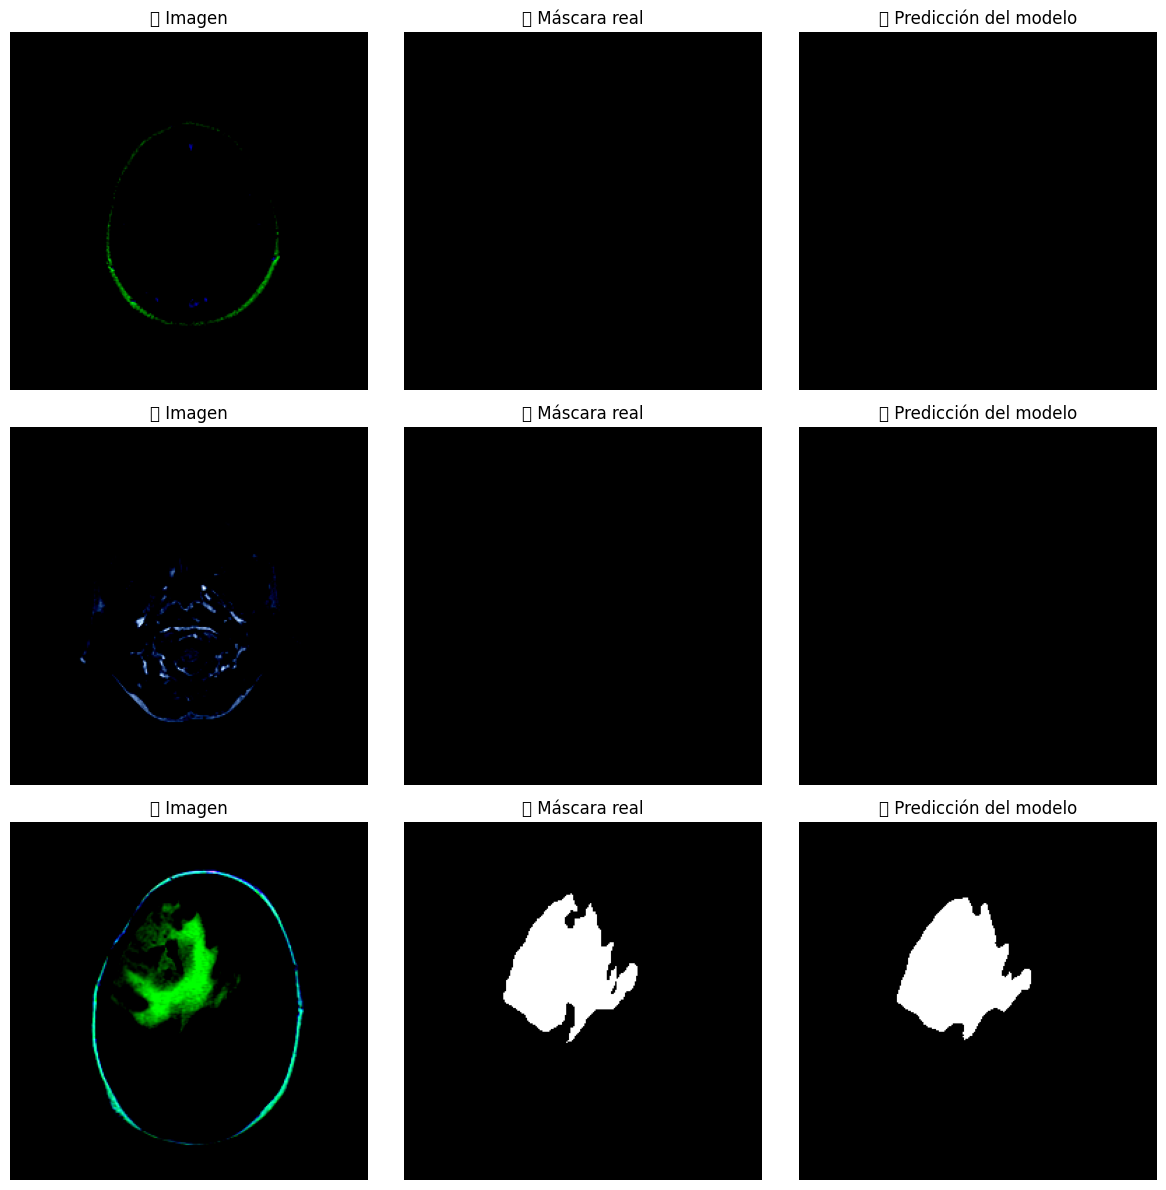

In [ ]:
# Para usar: pasar listas de rutas image_paths y mask_paths correctamente alineadas
#ESTE CODIGO SE EJECUTA EXCLUSIVAMENTE PARA ENTRENAR EL MODELO


model = run_training(image_paths, mask_paths)

val_dataset_augmented = TumorDataset(val_images, val_masks, transform=test_transform)
show_predictions(model, val_dataset_augmented)

Se guarda y descarga el modelo.
Este modelo se sube a Google Drive y se publica un link para que cualquier persona que quiera ejecutar este modelo pueda hacerlo.

In [ ]:
torch.save(model.state_dict(), "modelo_tumores.pth")

from google.colab import files
files.download("modelo_tumores.pth")




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

A partir de aquí es código para hacer pruebas con imágenes y visualizar las predicciones. Importante realizar pruebas con imágenes diferentes a las del entrenamiento.

In [ ]:
def preprocess_single_image(image_path):

    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    transform = A.Compose([
        A.Resize(IMG_DIM, IMG_DIM),
        A.Normalize(),
        ToTensorV2()
    ])

    augmented = transform(image=img)
    img_tensor = augmented['image'].unsqueeze(0).to(DEVICE)

    return img_tensor, img


In [ ]:
def predict_single_image(model, image_path):
    model.eval()
    img_tensor, original_img = preprocess_single_image(image_path)

    with torch.no_grad():
        pred = torch.sigmoid(model(img_tensor))
        pred_mask = (pred > 0.5).float().cpu().squeeze().numpy()

    return original_img, pred_mask


In [ ]:
def visualize_prediction(image_path, model):
    original_img, pred_mask = predict_single_image(model, image_path)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("🧠 Imagen original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(original_img, alpha=0.8)
    plt.imshow(pred_mask, cmap='Reds', alpha=0.4)
    plt.title("🔍 Tumor detectado")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
#https://drive.google.com/file/d/1Ggxgqq_oSyZz-85flcUpUmiolS4g0rAP/view?usp=drive_link
!pip install gdown  # solo la primera vez

import gdown

#ID del modelo en Google Drive
file_id = "1Ggxgqq_oSyZz-85flcUpUmiolS4g0rAP"
output = "modelo_tumores.pth"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

model = UNet().to(DEVICE)
model.load_state_dict(torch.load("modelo_tumores.pth"))
model.eval()

#visualize_prediction("/content/TCGA_CS_4943_20000902_12.tif", model)

Downloading...
From (original): https://drive.google.com/uc?id=1Ggxgqq_oSyZz-85flcUpUmiolS4g0rAP
From (redirected): https://drive.google.com/uc?id=1Ggxgqq_oSyZz-85flcUpUmiolS4g0rAP&confirm=t&uuid=fa970f82-5984-486f-a99b-bd414278f902
To: /content/modelo_tumores.pth
100%|██████████| 124M/124M [00:03<00:00, 34.0MB/s]


UNet(
  (enc1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (enc3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_r

Interfaz gradio para hacer pruebas con diferentes imágenes del dataset

In [ ]:
!pip install gradio

import gradio as gr
from PIL import Image
import cv2
import numpy as np

def predict_gradio(img_pil):
    # Convertimos PIL a OpenCV
    img = np.array(img_pil)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    transform = A.Compose([
        A.Resize(IMG_DIM, IMG_DIM),
        A.Normalize(),
        ToTensorV2()
    ])

    augmented = transform(image=img_rgb)
    img_tensor = augmented['image'].unsqueeze(0).to(DEVICE)

    with torch.no_grad():
        pred = torch.sigmoid(model(img_tensor))
        pred_mask = (pred > 0.5).float().cpu().squeeze().numpy()


    mask_colored = np.zeros_like(img_rgb)
    mask_colored[:,:,0] = (pred_mask * 255).astype(np.uint8)

    overlay = cv2.addWeighted(img_rgb, 0.8, mask_colored, 0.5, 0)
    overlay_pil = Image.fromarray(overlay)

    return img_pil, overlay_pil

interface = gr.Interface(
    fn=predict_gradio,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Image(type="pil", label="Imagen original"),
             gr.Image(type="pil", label="Predicción del modelo")],
    title="🧠 Detector de Tumores Cerebrales",
    description="Sube una imagen MRI de cerebro y el modelo detectará el tumor"
)

interface.launch(share=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.6 MB/s eta 0:00:00
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ece34ab186adda22ea.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
